Thêm các thư viện cần thiết

In [64]:
import warnings

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load data từ BikeSharingDemand

In [65]:
# Đọc dữ liệu 
dt = pd.read_csv("BikeSharingDemand.csv")
print ( "Hiển thị 5 dòng đầu của tập data\n ", dt.head())
print ( "Xem kiểu dữ liệu của từng thuộc tính ", dt.dtypes)
print ( "Xem thông tin của dữ liệu ", dt.info())
print ( "Kiểm tra giá trị thiếu\n",dt.isnull().sum())

Hiển thị 5 dòng đầu của tập data
          datetime  season  holiday  workingday  weather  temp   atemp  \
0  1/1/2011 0:00       1        0           0        1  9.84  14.395   
1  1/1/2011 1:00       1        0           0        1  9.02  13.635   
2  1/1/2011 2:00       1        0           0        1  9.02  13.635   
3  1/1/2011 3:00       1        0           0        1  9.84  14.395   
4  1/1/2011 4:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
Xem kiểu dữ liệu của từng thuộc tính  datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windsp

Chú thích cho tập dữ liệu  <br>
datetime: cho biết thời gian theo dịnh dạng "%m/%d/%Y %H:%M:%hS  <br> 
season: cho biết mùa  <br> 
1: mùa xuân  <br>
2: mùa hè  <br>
3: mùa thu  <br>
4: mùa đông  <br>
workingday: cho biết có phải là ngày làm việc không bao gồm cả cuối tuần và ngày lễ  <br> 
1: ngày làm việc  
0: ngày không làm việc 
weather: Cho biết thời tiết  <br>
1: Trời trong, có mây, có mây rải rác  <br>
2: Sương mù + Đầy mây, sương mù + ít mây, sương mù  <br>
3: Tuyết nhẹ, mưa nhẹ + sấm sét + mây rải rác, mưa nhẹ + mây rải rác  <br>
4: Mưa lớn + mảnh băng + sấm sét + sương mù, tuyết + sương mù  <br>
temp: Nhiệt độ thực tế tính theo độ Celsius (độ C)  <br>
atemp: Nhiệt độ mà con người cảm thấy tính theo độ Celsius (độ C) <br>
humidity: Độ ẩm tương đối <br>
windspeed: Tốc độ gió <br>
casual: Số lượng xe thuê mà không có đăng ký dịch vụ <br>
registered: Số lượng xe thuê mà có đăng ký dịch vụ <br>
count: Tổng số lượng xe được thuê <br>

Xử lý data

In [66]:
# tạo cột year, month, day, hour,weekday từ cột datetime
dt["datetime"] = pd.to_datetime(dt["datetime"])
dt["year"] = dt["datetime"].dt.year
dt["month"] = dt["datetime"].dt.month
dt["weekday"] = dt["datetime"].dt.weekday
dt["hour"] = dt["datetime"].dt.hour
print(" Hiển thị 5 dòng đầu của tập data\n",  dt.head())
print(" Xem kiểu dữ liệu của từng thuộc tính",  dt.dtypes)
print(" Xem thông tin của dữ liệu",  dt.info())
print(" Kiểm tra giá trị thiếu", dt.isnull().sum())

 Hiển thị 5 dòng đầu của tập data
              datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  weekday  hour  
0        81        0.0       3          13     16  2011      1        5     0  
1        80        0.0       8          32     40  2011      1        5     1  
2        80        0.0       5          27     32  2011      1        5     2  
3        75        0.0       3          10     13  2011      1        5     3  
4        75        0.0       0           1      1  2011      1        5     4  
 Xem kiểu dữ liệu của 

Chú thích các thuộc tính mới  <br>
month: tháng (1-12)  <br>
year: năm (2011, 2012)  <br>
hour: giờ trong ngày (0-23 giờ)  <br>
weekday: ngày trong tuần  <br> 
0: thứ 2  <br>
1: thứ 3  <br>
2: thứ 4  <br>
3: thứ 5  <br>
4: thứ 6  <br>
5: thứ 7  <br>
6: chủ nhật  <br>

Vẽ biểu đồ phân phối thuộc tính season

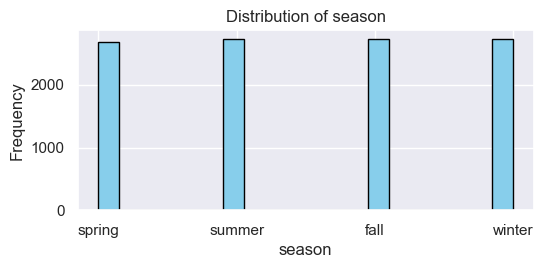

In [67]:
# vẽ biểu đồ phân phối của cột season
codes = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
dt["season"] = dt["season"].map(codes)
plt.figure(figsize=(12, 6))
plt.title("Distribution of season")
plt.hist(dt["season"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("season")
plt.ylabel("Frequency")
plt.grid(True)
plt.subplots_adjust(left=0.12, bottom=0.2, top=0.5, right=0.5, wspace=0.2, hspace=0.2)
plt.show()

Vẽ biểu đồ phân phối thuộc tính holiday

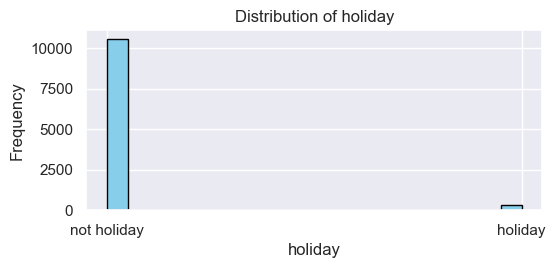

In [68]:
# vẽ biểu đồ phân phối của cột holiday
codes = {1: "holiday", 0: "not holiday"}
dt["holiday"] = dt["holiday"].map(codes)
plt.figure(figsize=(12, 6))
plt.title("Distribution of holiday")
plt.hist(dt["holiday"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("holiday")
plt.ylabel("Frequency")
plt.grid(True)
plt.subplots_adjust(left=0.12, bottom=0.2, top=0.5, right=0.5, wspace=0.2, hspace=0.2)
plt.show()

Vẽ biểu đồ phân phối cột WorkingDay

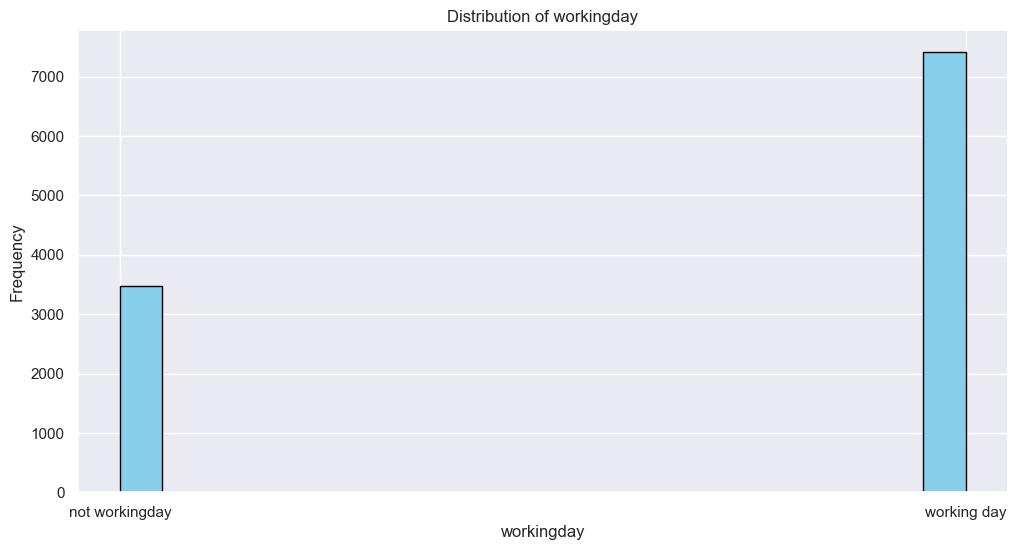

In [69]:
# vẽ biểu đồ phân phối của cột workingday
codes = {1: "working day", 0: "not workingday"}
dt["workingday"] = dt["workingday"].map(codes)
plt.figure(figsize=(12, 6))
plt.title("Distribution of workingday")
plt.hist(dt["workingday"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("workingday")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính weather

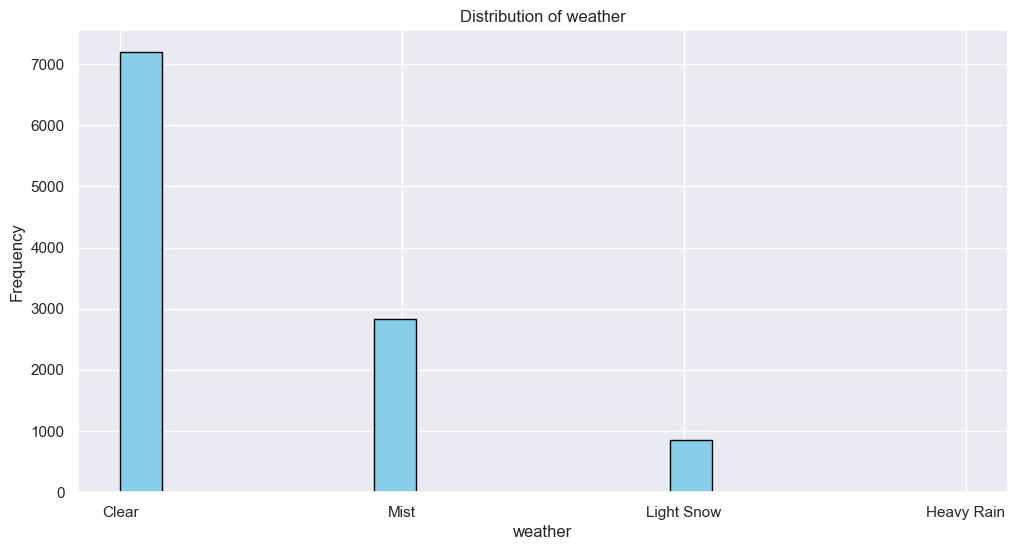

In [70]:
# vẽ biểu đồ phân phối của cột weather
codes = {1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"}
dt["weather"] = dt["weather"].map(codes)
plt.figure(figsize=(12, 6))
plt.title("Distribution of weather")
plt.hist(dt["weather"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("weather")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính temp

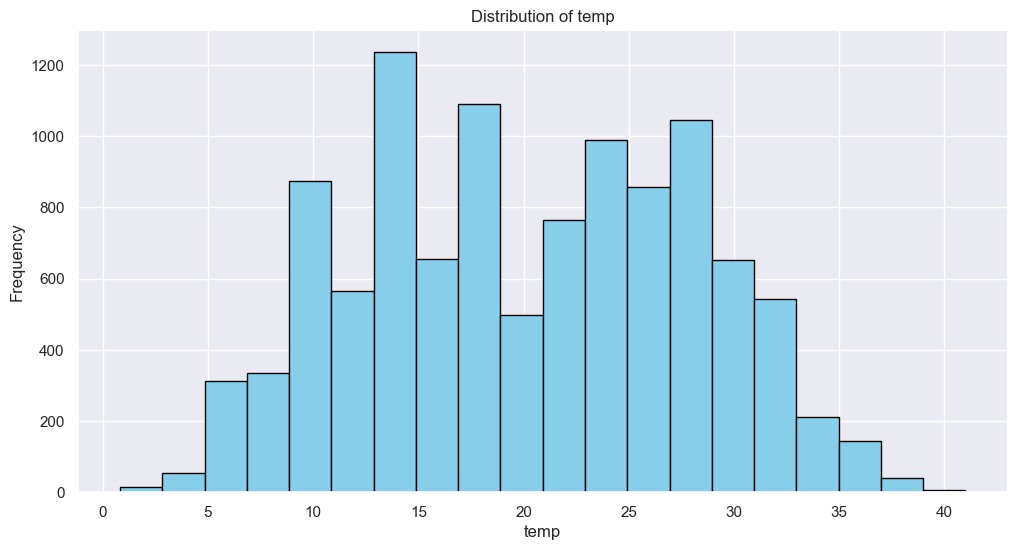

In [71]:
# vẽ biểu đồ phân phối của cột temp
plt.figure(figsize=(12, 6))
plt.title("Distribution of temp")
plt.hist(dt["temp"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("temp")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Vẽ biểu đồ phân phối thuộc tính atemp

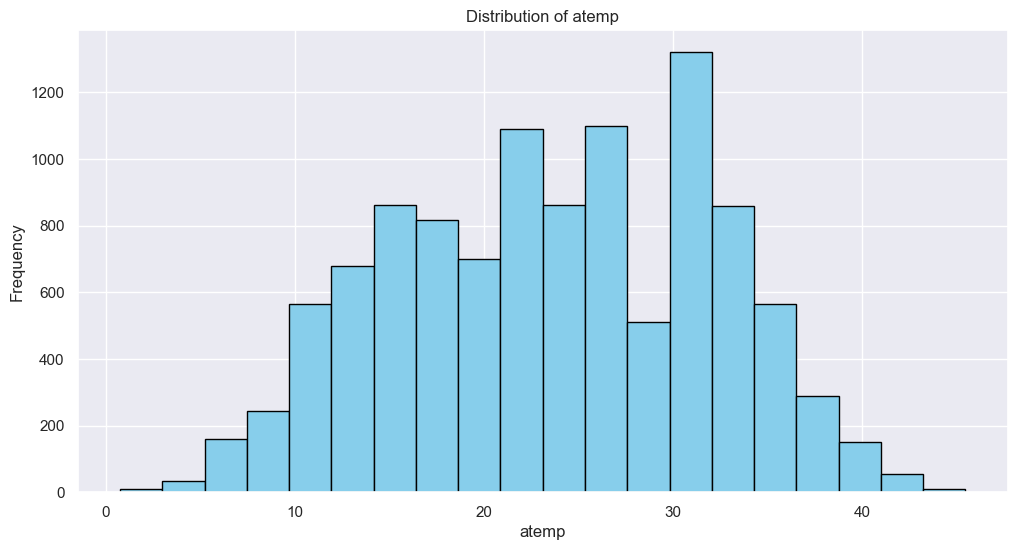

In [72]:
# vẽ biểu đồ phân phối của cột atemp
plt.figure(figsize=(12, 6))
plt.title("Distribution of atemp")
plt.hist(dt["atemp"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("atemp")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Vẽ biểu đồ phân phối thuộc tính humidity

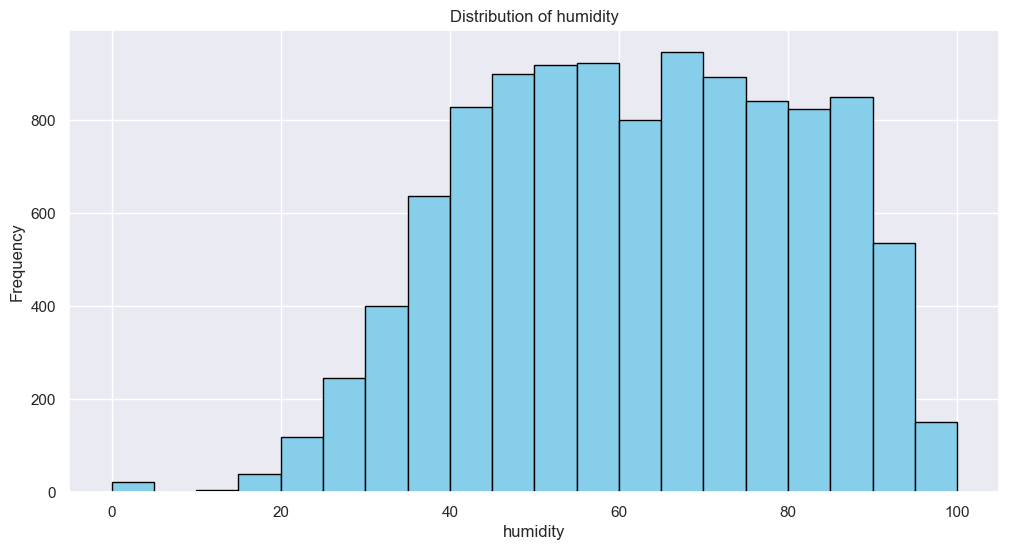

In [73]:
# vẽ biểu đồ phân phối của cột humidity
plt.figure(figsize=(12, 6))
plt.title("Distribution of humidity")
plt.hist(dt["humidity"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("humidity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính windspeed

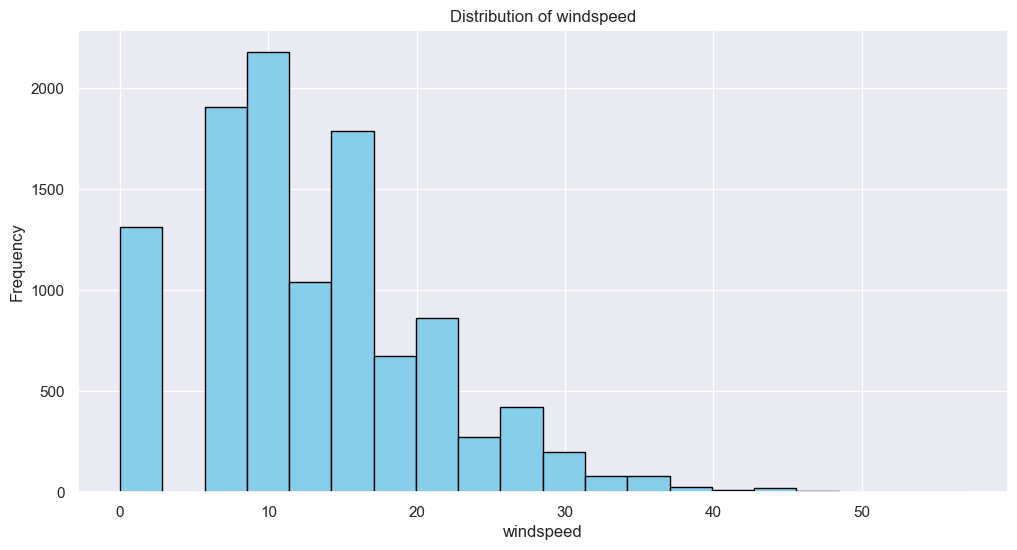

In [74]:

# vẽ biểu đồ phân phối của cột windspeed
plt.figure(figsize=(12, 6))
plt.title("Distribution of windspeed")
plt.hist(dt["windspeed"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("windspeed")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Vẽ biểu đồ phân phối thuộc tính hour

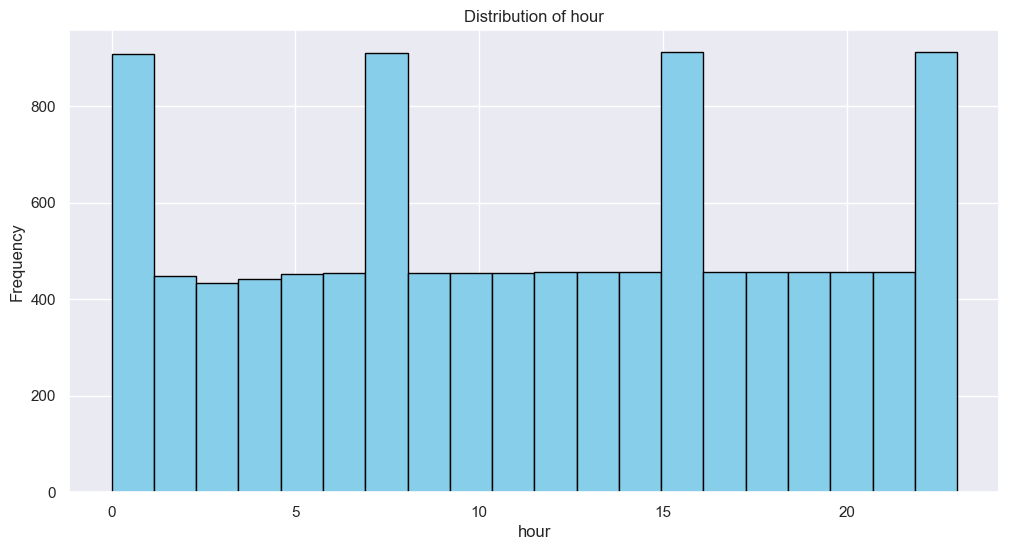

In [75]:
# vẽ biểu đồ phân phối của cột hour
plt.figure(figsize=(12, 6))
plt.title("Distribution of hour")
plt.hist(dt["hour"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("hour")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính month

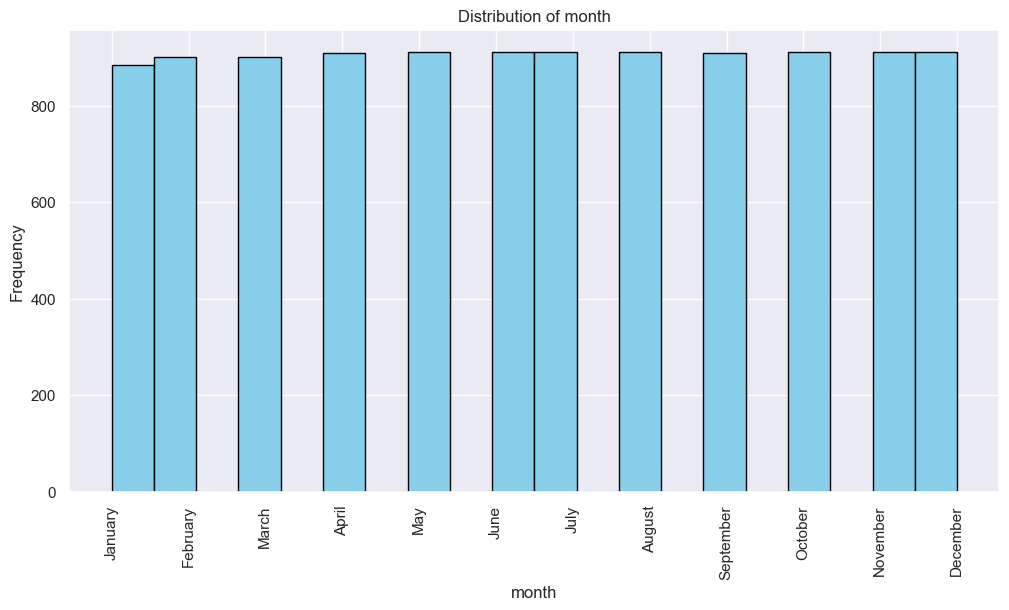

In [76]:
# Vẽ biểu đồ phân phối của cột month
code = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October", 
    11: "November",
    12: "December",
}
dt["month"] = dt["month"].map(code)
plt.figure(figsize=(12, 6))
plt.title("Distribution of month")
plt.hist(dt["month"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("month")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính weekday

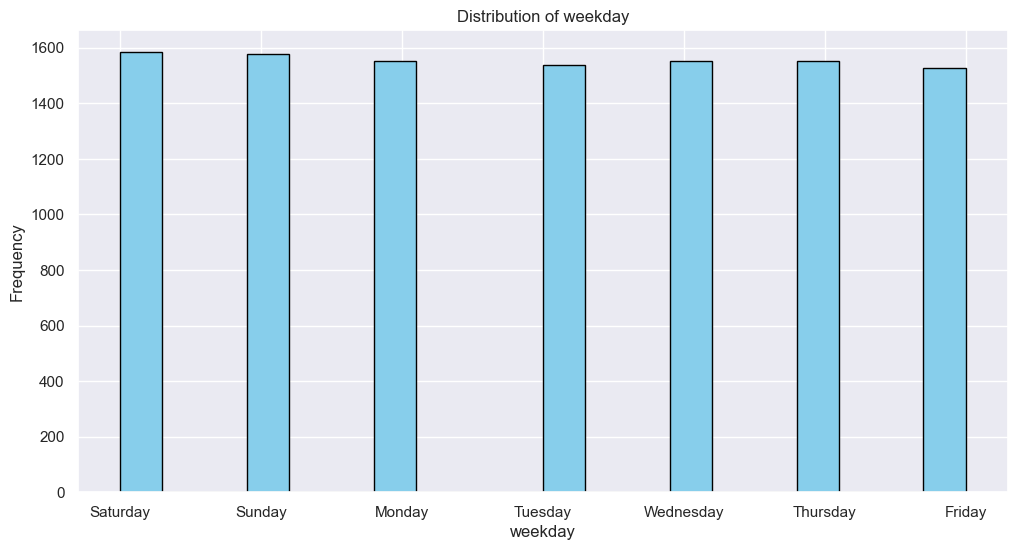

In [77]:
# vẽ biểu đồ phân phối của cột weekday
code = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}
dt["weekday"] = dt["weekday"].map(code)
plt.figure(figsize=(12, 6))
plt.title("Distribution of weekday")
plt.hist(dt["weekday"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("weekday")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối thuộc tính year

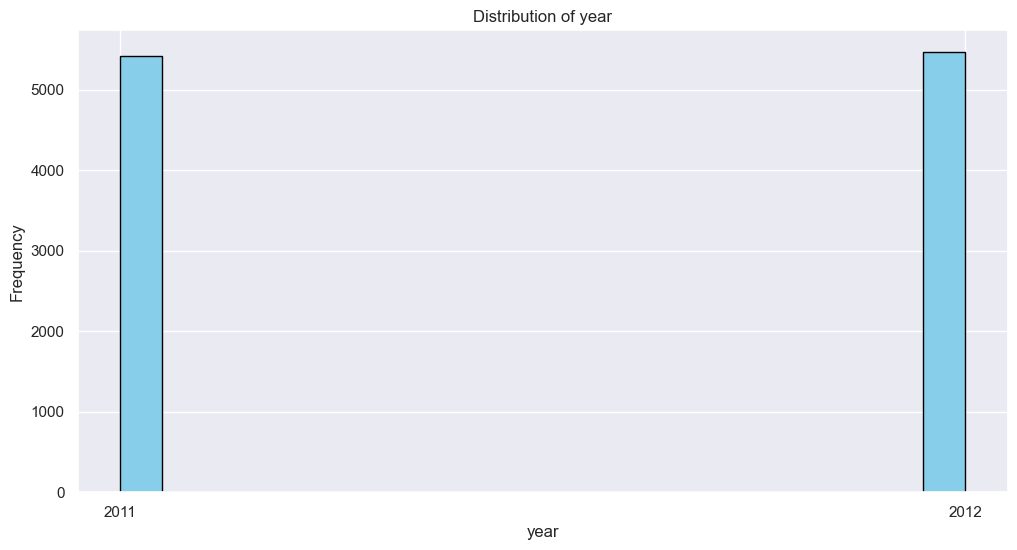

In [78]:
# vẽ biểu đồ phân phối của cột year
plt.figure(figsize=(12, 6))
plt.title("Distribution of year")
plt.hist(dt["year"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.xticks([2011, 2012])
plt.grid(True)
plt.show()

Vẽ biểu đồ phân phối cột count

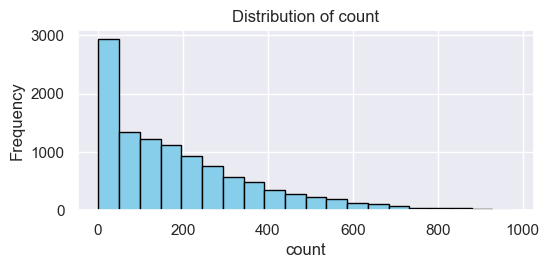

In [79]:
# vẽ biểu đồ phân phối của cột count
plt.figure(figsize=(12, 6))
plt.title("Distribution of count")
plt.hist(dt["count"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("count")
plt.ylabel("Frequency")
plt.grid(True)
plt.subplots_adjust(left=0.12, bottom=0.2, top=0.5, right=0.5, wspace=0.2, hspace=0.2)
plt.show()


Biểu diễn mối quan hệ giữa Season và Count

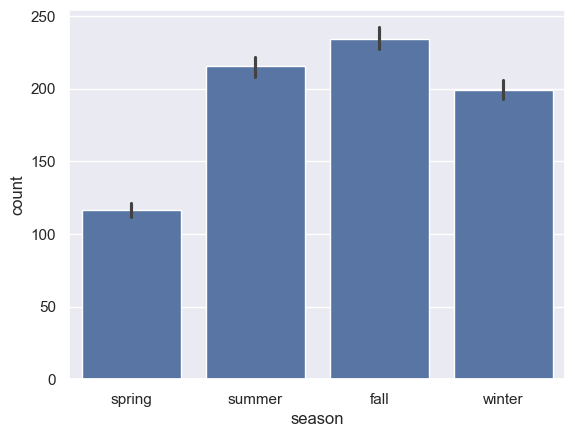

In [80]:
# Trực quan hoá dữ liệu count và seeson
sns.barplot(x="season", y="count", data=dt)
plt.show()

Biểu diễn mối quan hệ giữa Holiday và Count

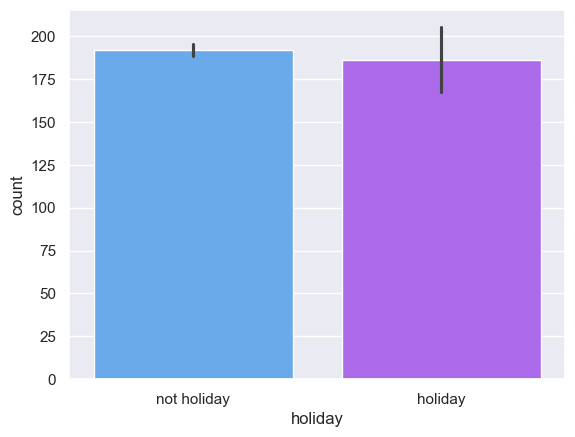

In [81]:
sns.barplot(x="holiday", y="count", data=dt, palette="cool")
plt.show()

Biểu diễn mối quan hệ giữa Workingday và Count

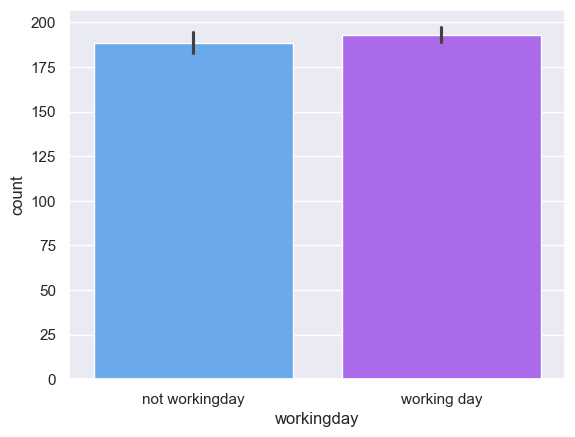

In [82]:
sns.barplot(x="workingday", y="count", data=dt, palette="cool")
plt.show()

Biểu diễn mối quan hệ giữa Weather và Count

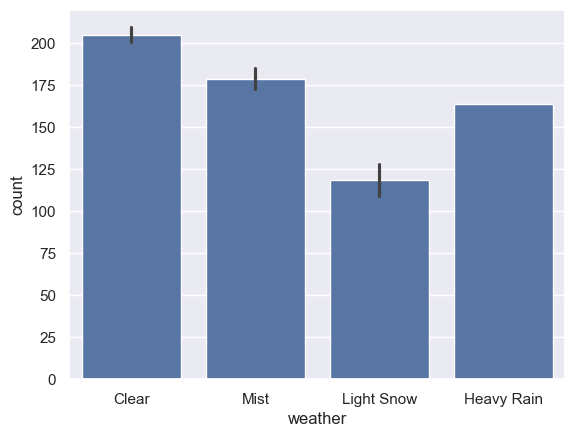

In [83]:
sns.barplot(x="weather", y="count", data=dt)
plt.show()

Biểu diễn mối quan hệ giữa Temp và Count

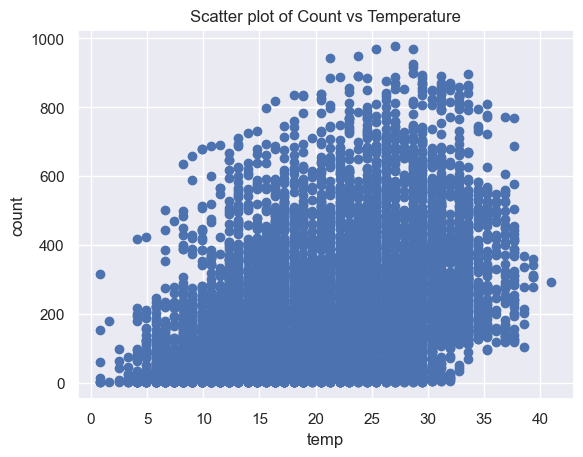

In [84]:
plt.scatter(x=dt["temp"], y=dt["count"])
plt.xlabel("temp")
plt.ylabel("count")
plt.title("Scatter plot of Count vs Temperature")
plt.show()

Biểu diễn mối quan hệ giữa Atemp và Count

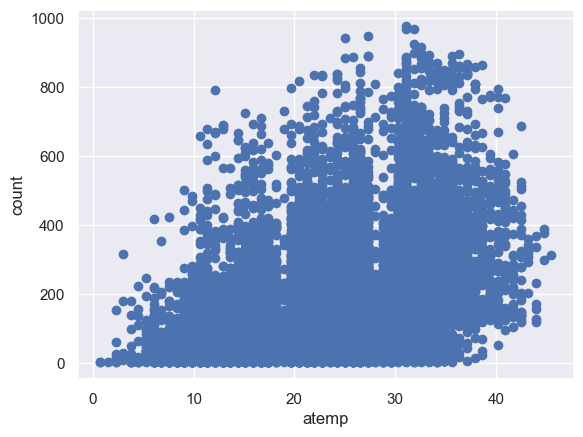

In [85]:
# Trực quan hoá dữ liệu count và atemp
plt.scatter(x="atemp", y="count", data=dt)
plt.xlabel("atemp")
plt.ylabel("count")
plt.show()

Biểu diễn mối quan hệ giữa Humidily và Count

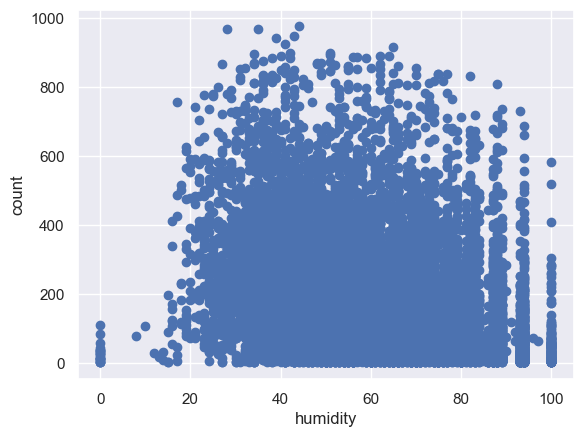

In [86]:
# Trực quan hoá dữ liệu count và humidity
plt.scatter(x="humidity", y="count", data=dt)
plt.xlabel("humidity")
plt.ylabel("count")
plt.show()

Biểu diễn mối quan hệ giữa Windspeed và Count

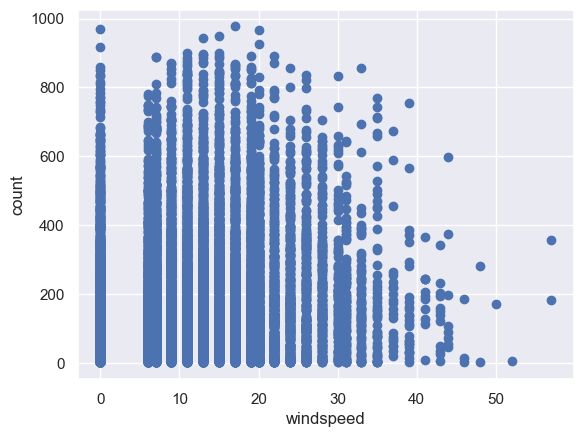

In [87]:
# Trực quan hoá dữ liệu count và windspeed
plt.scatter(x="windspeed", y="count", data=dt)
plt.xlabel("windspeed")
plt.ylabel("count")
plt.show()

Biểu diễn mối quan hệ giữa Year và Count

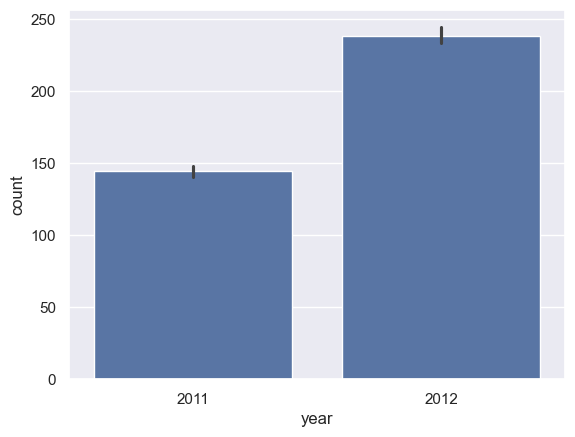

In [88]:
# Trực quan hoá dữ liệu count và year
sns.barplot(x="year", y="count", data=dt)
plt.show()
